In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'winequality-white.csv'
df = pd.read_csv(filename, delimiter=';')
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [3]:
# missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
# data types
print(df.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [5]:
Float = df.select_dtypes(include = ["float64"]).keys()
Float

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [6]:
summary_stats = df[Float].describe()
print(summary_stats)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [7]:
Numerical = df.select_dtypes(include = ["int64"]).keys()
Numerical

Index(['quality'], dtype='object')

In [8]:
df[Numerical].describe()

,quality
count,4898.000000
mean,5.877909
std,0.885639
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


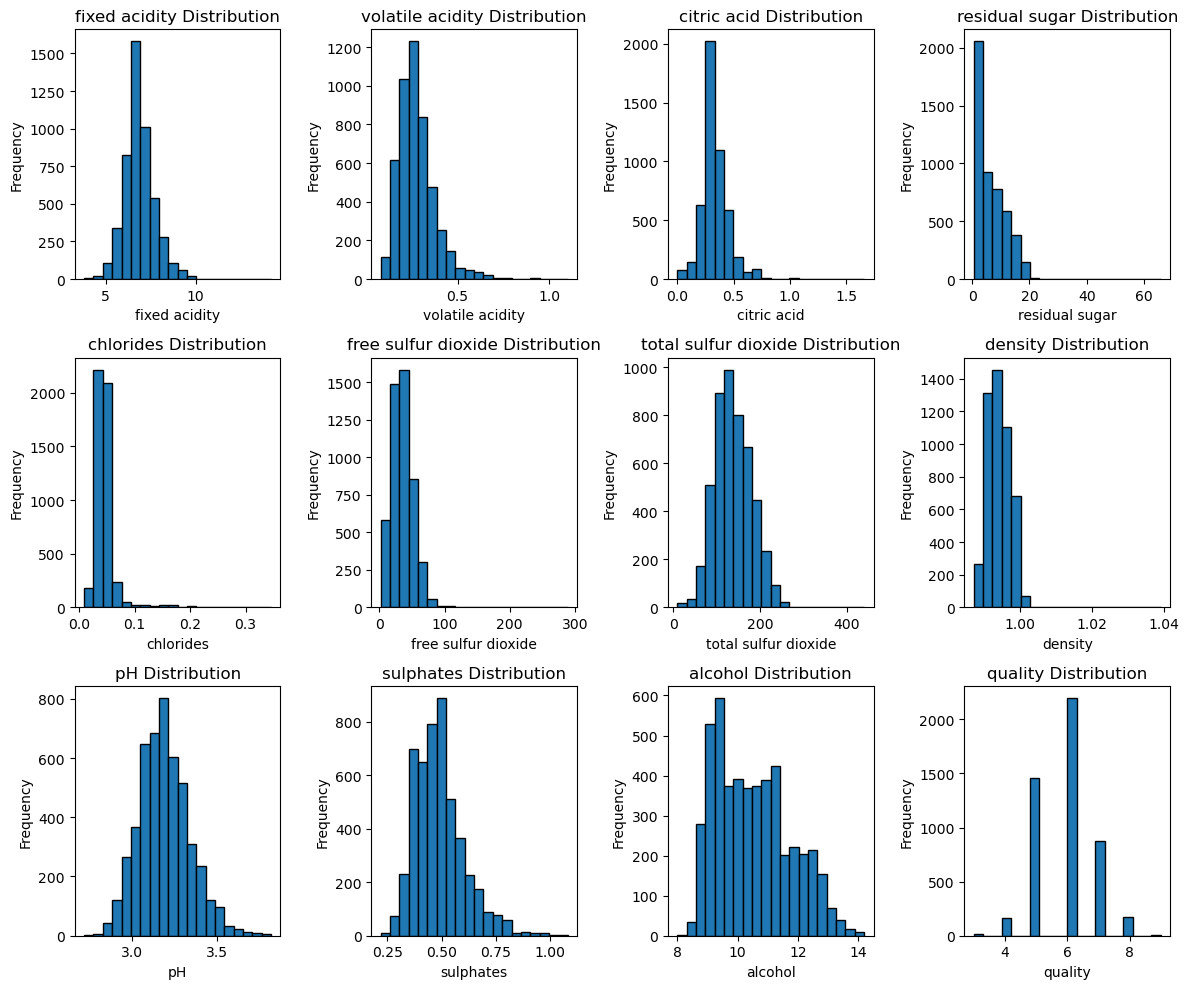

In [9]:
fig, axs = plt.subplots(3, 4, figsize=(12, 10), tight_layout=True)
for i, (col, ax) in enumerate(zip(df.columns, axs.flat)):
    ax.hist(df[col], bins=20, edgecolor='black')
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.show()

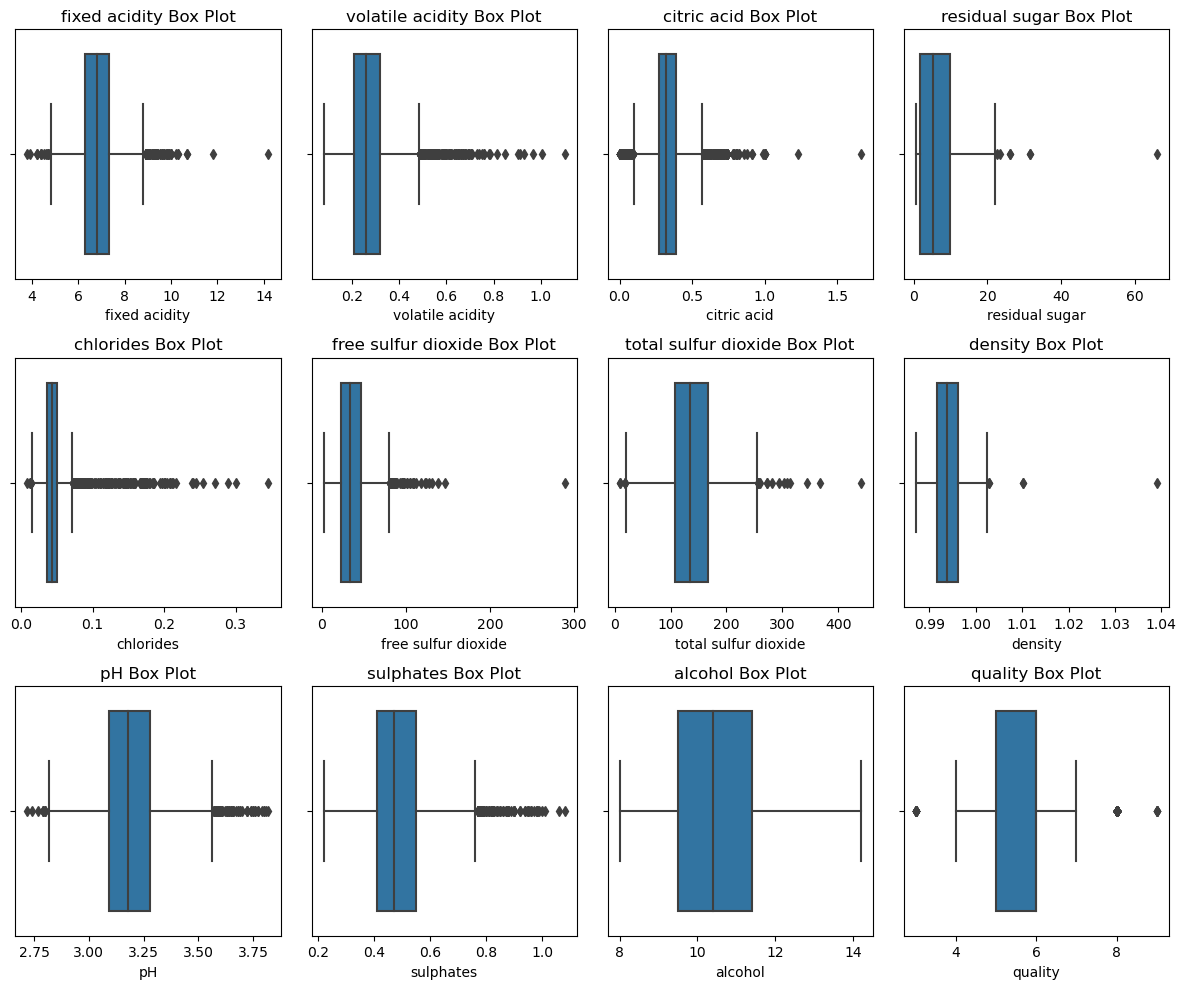

In [10]:
fig, axs = plt.subplots(3, 4, figsize=(12, 10), tight_layout=True)
for i, (col, ax) in enumerate(zip(df.columns, axs.flat)):
    sns.boxplot(x=df[col], ax=ax) 
    ax.set_title(f"{col} Box Plot")
plt.show()

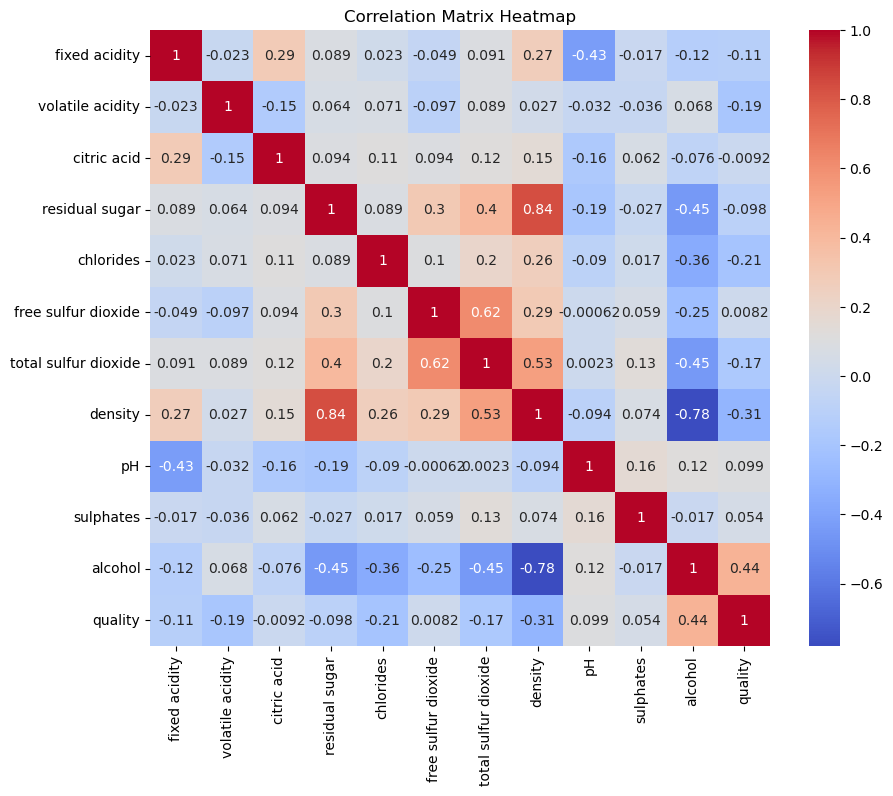

In [11]:
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr_mat, 
    annot=True, 
    cmap="coolwarm",
    ax=ax
)
ax.set_title("Correlation Matrix Heatmap")
ax.set_xticklabels(corr_mat.columns)
ax.set_yticklabels(corr_mat.columns)
plt.show()

**Regression Algorithms**

In [12]:
target_variable = 'quality'#As we have to predict the quality of the wine


def split_features_target(data, target_variable):
    X = data.drop(target_variable, axis=1)#Features
    y = data[target_variable]#Target Variable
    return X, y

#adds a column of ones to the feature matrix. 
def add_bias(X):
    return np.column_stack([np.ones(X.shape[0]), X])
'''
Linear regression is implemented by first adding a column of 1s (bias term) to the feature matrix.The normal equation is then used to calculate the optimal weights by finding the closed-form solution that minimizes least squares loss. 
 To get the predicted quality scores, these weights are multiplied by the test feature matrix. RMSE and MSE are used to compare predictions to actual test labels in order to assess performance. Better fit is indicated by lower values.
'''
# Linear Regression
def linear_regression(X_train, y_train, X_test):
    X_train_bias = add_bias(X_train)
    X_test_bias = add_bias(X_test)
    weights = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train#calculates the weights using the normal equation and predicts the target variable for the test set.
    predictions = X_test_bias @ weights
    return predictions
'''
All weights are initialised to 0 in Lasso regression, and an L1 regularisation penalty is added before the weights are updated iteratively via gradient descent. Many weights become precisely 0 as a result of this penalty, resulting in feature selection. When test features are multiplied by weights to create predictions, the prediction function is the same as that of linear regression.
RMSE and MSE metrics are used to compare test predictions with actual quality scores in order to assess the model. Better generalisation is implied by lower values.
'''
# Lasso Regression
def lasso_regression(X_train, y_train, X_test, alpha, max_iter=1000, tol=1e-4):
    X_train_bias = add_bias(X_train)
    X_test_bias = add_bias(X_test)
    num_samples, num_features = X_train_bias.shape
    weights = np.zeros(num_features)
    #iteratively updates the weights for each feature to minimize the objective function with an additional L1 penalty term.
    for _ in range(max_iter):
        old_weights = weights.copy()
        for j in range(num_features):
            X_j = X_train_bias[:, j]
            ro_j = X_j @ (y_train - X_train_bias @ weights + weights[j] * X_j)
            if j == 0:
                weights[j] = ro_j / np.sum(X_j**2)
            else:
                if ro_j < -alpha / 2:
                    weights[j] = (ro_j + alpha / 2) / np.sum(X_j**2)
                elif ro_j > alpha / 2:
                    weights[j] = (ro_j - alpha / 2) / np.sum(X_j**2)
                else:
                    weights[j] = 0

        if np.linalg.norm(old_weights - weights, ord=np.inf) < tol:
            break
    
    return X_test_bias @ weights
'''
A bias column is also added to the feature matrix at the start of ridge regression. When computing weights, an L2 regularisation penalty is applied, which reduces weights but does not precisely set them to 0. To predict wine quality scores, test features are multiplied by these ridge regression weights. 
Model performance is quantified by comparing predictions with true test labels using RMSE and MSE. Reduced errors indicate improved fit and forecasting skills.
'''
# Ridge Regression
def ridge_regression(X_train, y_train, X_test, alpha):
    X_train_bias = add_bias(X_train)
    X_test_bias = add_bias(X_test)
    num_features = X_train_bias.shape[1]
    identity_matrix = np.identity(num_features)
    # Regularization term is added to the diagonal of the matrix
    weights = np.linalg.inv(X_train_bias.T @ X_train_bias + alpha * identity_matrix) @ X_train_bias.T @ y_train
    predictions = X_test_bias @ weights
    return predictions

# Function to calculate Root Mean Squared Error (RMSE)
#Lower RMSE indicates better performance.
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions - targets)**2))
#MSE measures the average squared difference between predicted and actual values.
def mse(predictions, targets):
    return np.mean((predictions - targets)**2)

# Reset the index to handle the KeyError issue
df.reset_index(drop=True, inplace=True)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]
X_train, y_train = split_features_target(train_data, target_variable)
X_test, y_test = split_features_target(test_data, target_variable)

ridge_alpha = 0.01
ridge_predictions = ridge_regression(X_train, y_train, X_test, alpha=ridge_alpha)
ridge_rmse = rmse(ridge_predictions, y_test)


# Linear Regression Values
linear_predictions = linear_regression(X_train, y_train, X_test)
linear_rmse = rmse(linear_predictions, y_test)
linear_mse = mse(linear_predictions, y_test)

# Lasso Regression Values
lasso_alpha = 0.01
lasso_predictions = lasso_regression(X_train, y_train, X_test, alpha=lasso_alpha, max_iter=2000)
lasso_rmse = rmse(lasso_predictions, y_test)
lasso_mse = mse(lasso_predictions, y_test)
ridge_predictions = ridge_regression(X_train, y_train, X_test, alpha=ridge_alpha)
ridge_mse = mse(ridge_predictions, y_test)
print(f"Ridge Regression RMSE: {ridge_rmse}")
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Lasso Regression RMSE: {lasso_rmse}")
print(f"Linear Regression MSE: {linear_mse}")
print(f"Lasso Regression MSE: {lasso_mse}")
print(f"Ridge Regression MSE: {ridge_mse}")


Ridge Regression RMSE: 0.714764856917554
Linear Regression RMSE: 0.7121870990905359
Lasso Regression RMSE: 0.7147765341201983
Linear Regression MSE: 0.5072104641109928
Lasso Regression MSE: 0.5109054937288829
Ridge Regression MSE: 0.5108888006843714


**Classification Algorithms**

In [13]:
'''
The feature matrix is first given a bias column by the logistic regression implementation. Then, iterating through a predetermined number of epochs, it computes the gradient, error terms, sigmoid activation predictions, and logits at each step. In order to minimise logistic loss, the weights are updated using fixed learning rate gradient descent optimisation in the negative gradient direction.
This keeps happening until the gradient norm falls below a tiny cutoff point. Probabilities that the quality score for the test set will be higher than average are produced by the trained model.
By contrasting these predictions with the true test labels, binarized to above and below average quality, performance is assessed.

'''
# Logistic Regression
def logistic_regression(X_train, y_train, X_test, max_iter=1000, tol=1e-4):
    X_train_bias = add_bias(X_train)
    X_test_bias = add_bias(X_test)
    num_features = X_train_bias.shape[1]
    weights = np.zeros(num_features)
    for _ in range(max_iter):
        logits = X_train_bias @ weights
        predictions = 1 / (1 + np.exp(-logits))
        errors = predictions - y_train
        gradient = X_train_bias.T @ errors
        weights -= 0.01 * gradient  # Gradient Descent to optimize weights
        if np.linalg.norm(gradient, ord=np.inf) < tol:
            break
    return 1 / (1 + np.exp(-(X_test_bias @ weights)))

train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]
X_train, y_train = split_features_target(train_data, target_variable)
X_test, y_test = split_features_target(test_data, target_variable)
logistic_predictions = logistic_regression(X_train, (y_train > y_train.mean()).astype(int), X_test)
logistic_rmse = rmse(logistic_predictions, (y_test > y_test.mean()).astype(int))
print(f"Logistic Regression RMSE: {logistic_rmse}")

def mse(predictions, targets):
    return np.mean((predictions - targets)**2)

logistic_predictions = logistic_regression(X_train, (y_train > y_train.mean()).astype(int), X_test)
logistic_mse = mse(logistic_predictions, (y_test > y_test.mean()).astype(int))
print(f"Logistic Regression MSE: {logistic_mse}")


C:\Users\Dell\AppData\Local\Temp\ipykernel_12056\368335372.py:15: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-logits))


Logistic Regression RMSE: 0.5458563764155085
Logistic Regression MSE: 0.2979591836734694


In [14]:
def classification_metrics(predictions, true_labels, threshold=0.5):
    predicted_classes = (predictions > threshold).astype(int)
    
    accuracy = np.mean(predicted_classes == true_labels)
    precision = np.sum((predicted_classes == 1) & (true_labels == 1)) / np.sum(predicted_classes == 1)
    recall = np.sum((predicted_classes == 1) & (true_labels == 1)) / np.sum(true_labels == 1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score

# Calculate classification metrics 
logistic_predictions = logistic_regression(X_train, (y_train > y_train.mean()).astype(int), X_test)
accuracy, precision, recall, f1_score = classification_metrics(logistic_predictions, (y_test > y_test.mean()).astype(int))

# Display classification metrics
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Logistic Regression Precision: {precision:.4f}")
print(f"Logistic Regression Recall: {recall:.4f}")
print(f"Logistic Regression F1 Score: {f1_score:.4f}")


C:\Users\Dell\AppData\Local\Temp\ipykernel_12056\368335372.py:15: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-logits))


Logistic Regression Accuracy: 0.7020
Logistic Regression Precision: 0.7020
Logistic Regression Recall: 1.0000
Logistic Regression F1 Score: 0.8249


In [15]:
'''
The SVM model rescales the feature data to a range of -1 to 1 by using min-max normalisation. Zeros are used to initialise the weights, zero bias, and default hyperparameters of the binary SVM classifier.
The SVM hinge loss objective and gradient are used to update the weights and bias as it goes through the training examples in the fitting loop. 
The main calculations are determining whether each instance meets the margin threshold and then updating the bias and weights.
Predictions on the test set are based on the sign of the decision boundary score following training. MSE and RMSE are used to compare predictions to binarized test labels, just like in logistic regression.

'''
# Data normalization
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized

# Support Vector Machine (SVM)
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        m, n = X.shape
        y = np.where(y <= 0, -1, 1)

        self.weights = np.zeros(n)
        self.bias = 0

        for epoch in range(self.num_epochs):
            for i in range(m):
                condition = y[i] * (np.dot(X[i], self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (
                        2 * self.lambda_param * self.weights - np.dot(X[i], y[i])
                    )
                    self.bias -= self.learning_rate * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) - self.bias)

# Resetting the index to handle the KeyError issue
df.reset_index(drop=True, inplace=True)
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

X_train, y_train = split_features_target(train_data, target_variable)
X_test, y_test = split_features_target(test_data, target_variable)

X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

# SVM model
svm_model = SVM()
svm_model.fit(X_train_normalized.values, (y_train > y_train.mean()).astype(int))
svm_predictions = svm_model.predict(X_test_normalized.values)
svm_mse = mse(svm_predictions, (y_test > y_test.mean()).astype(int))
svm_rmse = rmse(svm_predictions, (y_test > y_test.mean()).astype(int))
print(f"SVM MSE: {svm_mse}")
print(f"SVM RMSE: {svm_rmse}")


SVM MSE: 0.8979591836734694
SVM RMSE: 0.9476070829586857


**Verifying using Scikit Learn**

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


target_variable = 'quality'
X = df.drop(target_variable, axis=1)
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))
linear_mse = mean_squared_error(y_test, linear_predictions)

# Lasso Regression
lasso_model = Lasso(alpha=0.01, max_iter=2000)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_mse = mean_squared_error(y_test, lasso_predictions)

# Ridge Regression
ridge_alpha = 0.01
ridge_model = Ridge(alpha=ridge_alpha)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_mse = mean_squared_error(y_test, ridge_predictions)

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, (y_train > y_train.mean()).astype(int))
logistic_predictions = logistic_model.predict(X_test)
logistic_rmse = np.sqrt(mean_squared_error((y_test > y_test.mean()).astype(int), logistic_predictions))
logistic_mse = mean_squared_error((y_test > y_test.mean()).astype(int), logistic_predictions)

# SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()
svm_model.fit(X_train_scaled, (y_train > y_train.mean()).astype(int))
svm_predictions = svm_model.predict(X_test_scaled)
svm_rmse = np.sqrt(mean_squared_error((y_test > y_test.mean()).astype(int), svm_predictions))
svm_mse = mean_squared_error((y_test > y_test.mean()).astype(int), svm_predictions)


print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Lasso Regression RMSE: {lasso_rmse}")
print(f"Ridge Regression RMSE: {ridge_rmse}")
print(f"Logistic Regression RMSE: {logistic_rmse}")
print(f"SVM RMSE: {svm_rmse}")
print(f"Linear Regression MSE: {linear_mse}")
print(f"Lasso Regression MSE: {lasso_mse}")
print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Logistic Regression MSE: {logistic_mse}")
print(f"SVM MSE: {svm_mse}")


Linear Regression RMSE: 0.7543373063311429
Lasso Regression RMSE: 0.7683838388086663
Ridge Regression RMSE: 0.7620733891401087
Logistic Regression RMSE: 0.5101020306102035
SVM RMSE: 0.47380354147934284
Linear Regression MSE: 0.5690247717229245
Lasso Regression MSE: 0.5904137237423426
Ridge Regression MSE: 0.5807558504354915
Logistic Regression MSE: 0.2602040816326531
SVM MSE: 0.22448979591836735
